# Descriptive Analysis 

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)
os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

'/Users/NatStrom'

In [3]:
data_analysis = pd.read_csv('data_final.csv')

In [4]:
data_analysis

,Unnamed: 0,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,...,death_tot,tot_affect,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
1,1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
2,2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
3,3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
4,4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,17854,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17855,17855,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17856,17856,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17857,17857,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


In [5]:
data_analysis = data_analysis.drop(columns={'Unnamed: 0'})

In [6]:
print(data_analysis.dtypes)
print(data_analysis.columns)
print(data_analysis.describe(include='all'))

## sanity check to ensure the spread of the data is correct
print('sanity check 1, ensure appropriate years and countries are represented')
list_country=list(list(data_analysis['iso'].drop_duplicates()))
list_year=list(list(data_analysis['year_id'].drop_duplicates()))
print('country list', list_country)
print('year list', list_year)
#inspect for NAs
print('following checks for completeness of all columns')
print(data_analysis['iso'].isnull().values.any())
print(data_analysis['year_id'].isnull().values.any())
print(data_analysis['ihme_dah_total_aid'].isnull().values.any())
print(data_analysis['best_log'].isnull().values.any())
print(data_analysis['daly_all'].isnull().values.any())
print(data_analysis['age0014_value'].isnull().values.any())
print(data_analysis['gdp_pcap_value'].isnull().values.any())
print(data_analysis['xpd_gdp_value'].isnull().values.any())
print(data_analysis['uhc_index'].isnull().values.any())
print(data_analysis['uhc_available_score'].isnull().values.any())
print(data_analysis['access_drinkwater_index'].isnull().values.any())
print(data_analysis['access_sani_index'].isnull().values.any())

iso                                                                                                                      object
year_id                                                                                                                   int64
daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                    float64
daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                    float64
daly_mean_All causes_Unsafe water source_btsx_All ages                                                                  float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages                    float64
daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages  

In [7]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17859 entries, 0 to 17858
Data columns (total 51 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   iso                                                                                                                   17859 non-null  object 
 1   year_id                                                                                                               17859 non-null  int64  
 2   daly_mean_All causes_No access to handwashing facility_btsx_All ages                                                  17859 non-null  float64
 3   daly_mean_All causes_Unsafe sanitation_btsx_All ages                                                                  17859 non-null  float64
 4   daly

## dependent variable

In [8]:
print(data_analysis['daly_all'].describe())
print(data_analysis['daly_all'].info())
#standard deviation should not be 0, that would mean it does not change over time

count    17859.000000
mean     16484.550535
std       9710.700434
min       1908.000000
25%       8813.000000
50%      14596.000000
75%      20698.000000
max      74108.000000
Name: daly_all, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 17859 entries, 0 to 17858
Series name: daly_all
Non-Null Count  Dtype  
--------------  -----  
17859 non-null  float64
dtypes: float64(1)
memory usage: 139.6 KB
None


In [9]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=False, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

custom_describe(data_analysis['daly_all'])
data_analysis['daly_all'].describe()

count    17859.000000
mean     16484.550535
std       9710.700434
min       1908.000000
25%       8813.000000
50%      14596.000000
75%      20698.000000
max      74108.000000
Name: daly_all, dtype: float64

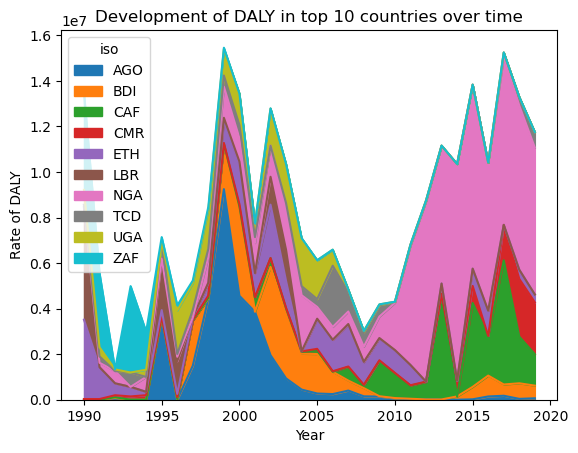

In [10]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'daly_all': 'sum'})
top_donors = grouped.groupby('iso').agg({'daly_all': 'sum'}).nlargest(10, 'daly_all').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='daly_all')
pivoted.plot.area(stacked=True)

plt.title('Development of DALY in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Rate of DALY')
plt.savefig('timetrend_daly.png')
# Show the plot
plt.show()

KeyboardInterrupt: 

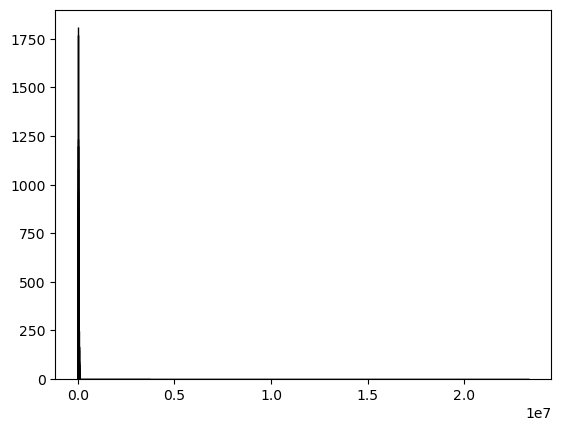

In [12]:
sns.histplot(data=data_analysis,palette='Set2',binwidth=1000)

# change the size of the plot
sns.set(rc={'figure.figsize':(8,6)})

# set the title and axis labels
plt.title('Comparison level 2 causes')
plt.xlabel('Level 2 Causes of DALY')
plt.ylabel('Count')

plt.savefig('comparison_daly.png')
# Show the plot
plt.show()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['daly_all'])
plt.title('Distribution of the DV – DALY sttributable to unsafe acceess to WASH')
plt.savefig('daly_all_hist.png')

In [ ]:
#test for skweness
import scipy
from scipy.stats import skewtest
scipy.stats.skewtest(data_analysis['daly_all'], axis=0, nan_policy='omit', alternative='two-sided')

In [ ]:
#test for outliers
## see data_analysis.daly_all.describe() or the boxplots
### clear indication that there are outliers - now use statistical tests

In [ ]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

## generally 29% missingness, which is strange since it sshould be complete, its estimates

In [ ]:
#what to do with missing data? balanced/ unbalanced panel?


In [ ]:
#time trend of the data
sns.lineplot(x='year_id',y='daly_all',data=data_analysis)
plt.title('Timetrend of the DV – DALY sttributable to unsafe acceess to WASH')
plt.savefig('daly_all_timetrend.png')

In [ ]:
#judging from the descriptive analysis, need there be any transformations?
##no

## independent variable

binary conflict variable

In [ ]:
data_analysis['dummy_conflict'].describe()

In [ ]:
data_analysis['dummy_conflict_hightreshold'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.title('Distribution of binary conflict predictor')
plt.savefig('dummy_conflict_hist.png')

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['dummy_conflict'],kde = True)
plt.title('Distribution of binary conflict predictor with high treshold')
plt.savefig('dummy_conflict_hist_hightreshoold.png')

best_log fatalities

In [ ]:
data_analysis['best_log'].describe()

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['best_log'],kde = True)
plt.title('Distribution of log-transformed conflict predictor')
plt.savefig('best_hist.png')

#what does the distribution say? --> log transform the variable

In [ ]:
#time trend of the data
grouped = data_analysis.groupby(['iso', 'year_id']).agg({'best_log': 'sum'})
top_donors = grouped.groupby('iso').agg({'best_log': 'sum'}).nlargest(10, 'best_log').index.tolist()
filtered = grouped[grouped.index.get_level_values('iso').isin(top_donors)]

# Pivot the data to create a column for each donor and a row for each year
pivoted = filtered.reset_index().pivot(index='year_id', columns='iso', values='best_log')
pivoted.plot.area(stacked=True)

plt.title('Development of conflict fatalities in top 10 countries over time')
plt.xlabel('Year')
plt.ylabel('Conflict fatalities logp1')
plt.savefig('timetrend_conflict.png')

# Show the plot
plt.show()

In [ ]:
##inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)

In [ ]:

sns.lineplot(x='year_id' ,y='dummy_conflict',data=data_analysis)
plt.title('Trendline of binary conflict predictor')
plt.savefig('conflict_trend.png')

In [ ]:

sns.lineplot(x='year_id' ,y='dummy_conflict_hightreshold',data=data_analysis)
plt.title('Trendline of binary conflict predictor with high treshold')
plt.savefig('conflict_trend_hightreshold.png')

In [ ]:

sns.lineplot(x='year_id' ,y='best_log',data=data_analysis)
plt.title('Trendline of log-tansformed conflict predictor')
plt.savefig('conflict_trend_log.png')

In [ ]:
#compare logtransformed with non logtransfomed variables

sns.histplot(data_analysis['best_log'],kde=True)

plt.savefig('conflict_log.png')

In [ ]:
#inspect the conflict lags
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_analysis['lag_best_5'],ax=axes[0])
sns.histplot(data_analysis['lag_best_10'],ax=axes[1])
sns.histplot(data_analysis['lag_best_20'],ax=axes[1])

plt.savefig('conflict_lag.png')

dummy type of conflict

In [ ]:
data_analysis[['dummy_sb','dummy_os','dummy_ns']].describe()

In [ ]:
sns.histplot(data_analysis['dummy_os'],kde=True)
plt.title('Distribution of one-sided violence')
plt.savefig('conflictos.png')

In [ ]:
sns.histplot(data_analysis['dummy_sb'],kde=True)
plt.title('Distribution of state-based violence')
plt.savefig('conflict_sb.png')

In [ ]:
#inspect the conflict lags
sns.histplot(data_analysis['dummy_ns'],kde=True)
plt.title('Distribution of non-state violence')
plt.savefig('conflict_ns.png')

dummy neighboring country in conflict

In [ ]:
data_analysis['dummy_neighbor'].describe()

In [ ]:
data_analysis['dummy_neighbor_hightreshold'].describe()

In [ ]:
sns.histplot(data_analysis['dummy_neighbor'],kde=True)
plt.title('Distribution of variable indicating neighboring conflict')
plt.savefig('conflict_neighbor.png')

In [ ]:
sns.histplot(data_analysis['dummy_neighbor_hightreshold'],kde=True)
plt.title('Distribution of variable indicating neighboring conflict with high treshold')
plt.savefig('conflict_neighbor_hightreshold.png')

## controls package standard

In [ ]:
#get descriptives
print(data_analysis['gdp_log'].describe())
print(data_analysis['age0014_value'].describe())
print(data_analysis['xpd_gdp_value'].describe())
# all variables vary over time, the std is not zero

In [ ]:
sns.histplot(data_analysis['gdp_log'],kde=True)
plt.title('Distribution of GDP, log-transformed')
plt.savefig('gdp_hist.png')

In [ ]:
sns.histplot(data_analysis['age0014_value'],kde=True)
plt.title('Distribution of population % aged between 0 and 14 years')
plt.savefig('age0014_hist.png')

In [ ]:
#produce distribution plot
sns.histplot(data_analysis['xpd_gdp_value'],kde=True)
plt.title('Distribution of government expenditure as % of GDP')
plt.savefig('gov_expense_hist.png')

#gdp has already been logtransformed

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

In [ ]:
data_analysis.to_csv('data_analysis.csv')

## controls package health

In [ ]:
#get descriptives
display(data_analysis['uhc_index'].describe())
display(data_analysis['dah_total_log'].describe())
#all varables vary over time, the std is not 0

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['dah_total_log'],kde = True)
plt.title('Distribution of development aid attributed to health')
plt.savefig('dah_hist.png')
##dah has already been log transformed

In [ ]:
#produce distribution plot
sns.histplot(data_analysis['uhc_index'],kde = True)
plt.title('Distribution of UHC index')
plt.savefig('uhc_hist.png')
##dah has already been log transformed

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

## controls package disaster

In [ ]:
#get descriptives
display(data_analysis['log_access_drinkwater_index'].describe())
display(data_analysis['log_access_sani_index'].describe())
display(data_analysis['death_tot'].describe())
display(data_analysis['gdis_count_lag'].describe())

In [ ]:
sns.histplot(data_analysis['log_access_drinkwater_index'],kde = True)
plt.title('Distribution of population with access to safe drinkwater, log-transformed')
plt.savefig('water_index_hist.png')

In [ ]:
sns.histplot(data_analysis['log_access_sani_index'],kde = True)
plt.title('Distribution of population with access to sanitation, log-transformed')
plt.savefig('sani_index_hist.png')

In [ ]:
sns.histplot(data_analysis['death_tot'],kde = True)
plt.title('Distribution of deaths due to natutral disasters')
plt.savefig('death_emdat_hist.png')

In [ ]:
#produce distribution plots
sns.histplot(data_analysis['gdis_count_lag'],kde = True)
plt.title('Distribution of disaster event counts, log-transformed')
plt.savefig('disaster_event_hist.png')

In [ ]:
#inspect missingness
is_null = data_analysis.isna().sum()
print(is_null)

values_list = list()
cols_list = list() 
for col in data_analysis.columns:
    pct_missing= np.mean(data_analysis[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
print(pct_missing_df)
#what does the missingness mean?
#shoul I impute the control variables?

In [ ]:
data_analysis.describe()

# Start the statistical analysis in python

In [13]:
import statsmodels

In [ ]:
## simple regression plot with line of best fit between two variables
plot3 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

In [ ]:
## simple regression plot with line of best fit between two variables
plot2 = sns.regplot(x='dummy_conflict',y='daly_all',data= data_analysis,scatter=False,fit_reg=True)

In [ ]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='best_log',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

In [ ]:
## simple regression scatterplot between two variables
plot4 = sns.regplot(x='dummy_conflict_hightreshold',y='daly_all',data= data_analysis,scatter=True,fit_reg=False)

In [ ]:
#plot of daly_all across all countries and years against the number of fatalities
 
sns.scatterplot(x=data_analysis['daly_all'], 
                y=data_analysis['best_log']).set(title='Y-o-Y % Change in daly versus Y-o-Y % Change in fatalities')

In [15]:
data = data_analysis.copy()

In [16]:
data.columns

Index(['iso', 'year_id',
       'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
       'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
       'daly_mean_All causes_Unsafe water source_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
       'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
       'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
       'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
       'daly_mean_Enteric in

In [ ]:
data.columns
data = data.filter(['iso', 'year_id','daly_all','best_log','best','dummy_conflict','dummy_neighbor','gdp_log','dah_total_log',
                    'age0014_value','xpd_gdp_value','uhc_index','lag_best_5', 'lag_best_10','lag_best_20','dummy_sb', 'dummy_ns', 'dummy_os','log_access_drinkwater_index', 'log_access_sani_index', 'death_tot','tot_affect', 'gdis_count_lag'])

In [ ]:
# Load the required packages
import pandas as pd
import statsmodels.api as sm

# Set the index to the panel data structure
data = data_analysis.set_index(['iso', 'year_id'])

# Create a fixed effects model with country fixed effects
exog_vars = data[['best_log','lag_best_5', 'lag_best_10','gdp_log','lag_best_20', 'age0014_value','xpd_gdp_value','dah_total_log','uhc_index']]
exog = sm.add_constant(data[exog_vars])
fe_model = sm.PanelOLS(data['daly_all'], exog, entity_effects=True)

# Cluster standard errors at the country level
fe_model = fe_model.fit(cov_type='clustered', cluster_entity=True)

# Print the regression output
print(fe_model.summary)

In [ ]:
?PanelOLS

In [ ]:
#the country fixed effects model without
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

In [ ]:
data.columns

In [18]:
data_sb = data.loc[data['type_of_violence'] == 'sb']
display(data_sb)

data_ns = data.loc[data['type_of_violence'] == 'ns']
display(data_ns)

data_os = data.loc[data['type_of_violence'] == 'os']
display(data_os)

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,death_tot,tot_affect,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.000000,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15715,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,2016.0,...,165.0,726982.0,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0
15716,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,2016.0,...,165.0,726982.0,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0
15717,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,2016.0,...,165.0,726982.0,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0
15718,UGA,2007,1966.0,2016.0,2711.0,1966.0,2016.0,2711.0,1030.0,2016.0,...,165.0,726982.0,105.0,50.0,4.663439,6693.0,1870.0,5757.0,5757.0,6693.0


,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,death_tot,tot_affect,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
1067,BDI,1997,5543.0,7311.0,9727.0,5543.0,7311.0,9727.0,3695.0,7311.0,...,21.0,24350.0,0.0,0.0,0.000000,22581.0,3694.0,20733.0,20733.0,22581.0
1347,BDI,2000,4986.0,6746.0,8978.0,4986.0,6746.0,8978.0,3414.0,6746.0,...,308.0,731191.0,1.0,1.0,0.693147,20710.0,3144.0,19138.0,19138.0,20710.0
1684,BDI,2003,4721.0,6427.0,8557.0,4721.0,6427.0,8557.0,3258.0,6427.0,...,6.0,230.0,39.0,11.0,3.688879,19705.0,2926.0,18242.0,18242.0,19705.0
1685,BDI,2003,4721.0,6427.0,8557.0,4721.0,6427.0,8557.0,3258.0,6427.0,...,6.0,230.0,39.0,11.0,3.688879,19705.0,2926.0,18242.0,18242.0,19705.0
1686,BDI,2003,4721.0,6427.0,8557.0,4721.0,6427.0,8557.0,3258.0,6427.0,...,6.0,230.0,39.0,11.0,3.688879,19705.0,2926.0,18242.0,18242.0,19705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17740,ZAF,2004,1284.0,1232.0,1994.0,1284.0,1232.0,1994.0,662.0,1232.0,...,5.0,15015174.0,224.0,197.0,5.416100,4510.0,1242.0,3888.0,3888.0,4510.0
17741,ZAF,2004,1284.0,1232.0,1994.0,1284.0,1232.0,1994.0,662.0,1232.0,...,5.0,15015174.0,224.0,197.0,5.416100,4510.0,1242.0,3888.0,3888.0,4510.0
17742,ZAF,2004,1284.0,1232.0,1994.0,1284.0,1232.0,1994.0,662.0,1232.0,...,5.0,15015174.0,224.0,197.0,5.416100,4510.0,1242.0,3888.0,3888.0,4510.0
17755,ZAF,2016,624.0,559.0,958.0,624.0,559.0,958.0,317.0,559.0,...,24.0,7520.0,131.0,121.0,4.882802,2141.0,612.0,1834.0,1834.0,2141.0


,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,death_tot,tot_affect,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
65,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
66,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
67,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
68,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
69,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17855,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17856,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17857,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


try for differernt types of conflicts in the model

In [39]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','lag_best_5','lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history_os.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0708
Estimator:                   PanelOLS   R-squared (Between):              0.2819
No. Observations:               17271   R-squared (Within):               0.0708
Date:                Wed, May 10 2023   R-squared (Overall):              0.2722
Time:                        19:17:35   Log-likelihood                -1.732e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      328.28
Entities:                          22   P-value                           0.0000
Avg Obs:                       785.05   Distribution:                 F(4,17245)
Min Obs:                       8.0000                                           
Max Obs:                       4583.0   F-statistic (robust):             8.8234
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


try for different causes

In [27]:
data

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,death_tot,tot_affect,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17855,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17856,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17857,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


In [34]:
#the country fixed effects model LAGS
from linearmodels.panel import PanelOLS
data1 = data_sb.set_index(['iso','year_id'])
y= data1['daly_cmnn']
x= data1[['best_log','lag_best_5', 'lag_best_10','lag_best_20']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_conflict_history.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              daly_cmnn   R-squared:                        0.1064
Estimator:                   PanelOLS   R-squared (Between):              0.3092
No. Observations:                7013   R-squared (Within):               0.1064
Date:                Wed, May 10 2023   R-squared (Overall):              0.2874
Time:                        19:14:38   Log-likelihood                -7.068e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      208.03
Entities:                          18   P-value                           0.0000
Avg Obs:                       389.61   Distribution:                  F(4,6991)
Min Obs:                       4.0000                                           
Max Obs:                       1674.0   F-statistic (robust):             3.2035
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [ ]:
#the country fixed effects model STANDARD
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])

y= data1['daly_all']
x= data1[['best_log','gdp_log', 'age0014_value','xpd_gdp_value',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('resuts_standard.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

In [ ]:
#the country fixed effects model HEALTH
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','dah_total_log','uhc_index']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_health_specification.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

In [43]:
#the country fixed effects model DISASTER
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['best_log','log_access_drinkwater_index', 'log_access_sani_index', 'death_tot','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_disaster_specification.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.4360
Estimator:                   PanelOLS   R-squared (Between):             -8.1095
No. Observations:               15036   R-squared (Within):               0.4360
Date:                Wed, May 10 2023   R-squared (Overall):             -15.333
Time:                        19:19:26   Log-likelihood                -1.452e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2319.7
Entities:                          28   P-value                           0.0000
Avg Obs:                       537.00   Distribution:                 F(5,15003)
Min Obs:                       1.0000                                           
Max Obs:                       4569.0   F-statistic (robust):             8.4389
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [48]:
#the country fixed effects model ALL
from linearmodels.panel import PanelOLS
data2 = data.set_index(['iso','year_id'])
y= data2['daly_all']
x= data2[['best_log','lag_best_5', 'lag_best_10','lag_best_20','gdp_log', 'age0014_value','xpd_gdp_value','dah_total_log','uhc_index','log_access_drinkwater_index', 'log_access_sani_index', 'death_tot','gdis_count_lag']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_all.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.9860
Estimator:                   PanelOLS   R-squared (Between):             -152.10
No. Observations:                1348   R-squared (Within):               0.9860
Date:                Wed, May 10 2023   R-squared (Overall):             -45.243
Time:                        19:20:54   Log-likelihood                 -1.02e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      7175.9
Entities:                          13   P-value                           0.0000
Avg Obs:                       103.69   Distribution:                 F(13,1322)
Min Obs:                       1.0000                                           
Max Obs:                       412.00   F-statistic (robust):         -2.609e+17
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [55]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor','dummy_sb']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_hightreshold.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               daly_all   R-squared:                        0.0055
Estimator:                   PanelOLS   R-squared (Between):             -0.2019
No. Observations:               17689   R-squared (Within):               0.0055
Date:                Wed, May 10 2023   R-squared (Overall):             -0.2137
Time:                        19:22:02   Log-likelihood                -1.775e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      32.793
Entities:                          34   P-value                           0.0000
Avg Obs:                       520.26   Distribution:                 F(3,17652)
Min Obs:                       1.0000                                           
Max Obs:                       4603.0   F-statistic (robust):             1.0888
                            

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/linearmodels/panel/model.py:1183: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor','dummy_ns','dummy_os','dummy_sb']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_all.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor','dummy_os',]]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_os.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)

In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor','dummy_sb']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_sb.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)


In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict_hightreshold','dummy_neighbor_hightreshold','dummy_sb','dummy_ns','dummy_os']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_all_hightresh.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)


In [ ]:
#the country fixed effects model DUMMY
from linearmodels.panel import PanelOLS
data1 = data.set_index(['iso','year_id'])
y= data1['daly_all']
x= data1[['dummy_conflict','dummy_neighbor']]
mod = PanelOLS(y,x, entity_effects=True,time_effects=False)
res = mod.fit(cov_type='clustered', cluster_entity=True)
with open('results_dummy_neighbor.txt', 'w') as f:
    f.write(res.summary.as_text())
print(res)


In [ ]:
### but the PANELOLS function from lienarmodels does exactly that already
'dummy_sb', 'dummy_ns', 'dummy_os',
       'intensity', 'dummy_low_intensity', 'dummy_medium_intensity',
       'dummy_high_intensity'

In [ ]:
#standard = data['age0014_value','gdp_log','xpd_gdp_value']
#health = data['uhc_index','dah_total_log']

from linearmodels.panel import PanelOLS
mod = PanelOLS.from_formula('daly_all ~ best_log+lag_best_10+gdp_log+lag_best_20+age0014_value+xpd_gdp_value+dah_total_log+uhc_index',data=data.set_index(['iso','year_id']))
result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]
with open('panel_ols_results.txt', 'w') as f:
    f.write(res.summary.as_text())
print(result)

In [ ]:
# Create a copy of the data for imputation
import statsmodels.api as sm
from statsmodels.api import PanelOLS
imputed_data = data.copy()
# Estimate a fixed effects model with the imputed data
y = imputed_data["daly_all"]
X = imputed_data[['best_log','gdp_log','dah_total_log','age0014_value','xpd_gdp_value','uhc_index','lag_best_5', 'lag_best_10',]]
fe_model = sm.PanelOLS(y, X, entity_effects=True)
fe_results = fe_model.fit(cov_type='clustered', cluster_entity=True)

fe_results
# Print the regression results
#fe_results.summary.as_latex()

In [ ]:
### now I try my luck in R

In [ ]:
from urllib import request
from scipy import stats
import pandas as pd
import numpy as np
import statsmodels.api as sm

print("Defining functions......")

def main():
    """
    Estimate baseline and degree day regression.

    Returns:
        data.frame with RMSE, SE, and tstats
    """

    # Baseline WLS Regression Cross-Validation with FE and trends
    print("Estimating Baseline Regression")
    basedat = cropdat[['ln_corn_yield', 'trend', 'trend_sq', 'corn_acres']]
    fe_group = pd.get_dummies(cropdat.fips)
    regdat = pd.concat([basedat, fe_group], axis=1)
    base_rmse, base_se, base_tstat = felm_cv(regdat, cropdat['trend'])

    # Degree Day Regression Cross-Validation
    print("Estimating Degree Day Regression")
    dddat = cropdat[['ln_corn_yield', 'dday0_10C', 'dday10_30C', 'dday30C',
                     'prec', 'prec_sq', 'trend', 'trend_sq', 'corn_acres']]
    fe_group = pd.get_dummies(cropdat.fips)
    regdat = pd.concat([dddat, fe_group], axis=1)
    ddreg_rmse, ddreg_se, ddreg_tstat = felm_cv(regdat, cropdat['trend'])

    # Get results as data.frame
    fdat = {'Regression': ['Baseline', 'Degree Day',],
            'RMSE': [base_rmse, ddreg_rmse],
            'se': [base_se, ddreg_se],
            't-stat': [base_tstat, ddreg_tstat]}

    fdat = pd.DataFrame(fdat, columns=['Regression', 'RMSE', 'se', 't-stat'])

    # Calculate percentage change
    fdat['change'] = (fdat['RMSE'] - fdat['RMSE'].iloc[0])/fdat['RMSE'].iloc[0]
    return fdat


def felm_rmse(y_train, x_train, weights, y_test, x_test):
    """
    Estimate WLS from y_train, x_train, predict using x_test, calculate RMSE,
    and test whether residuals are independent.

    Arguments:
        y_train: Dep variable - Full or training data
        x_train: Covariates - Full or training data
        weights: Weights for WLS
        y_test: Dep variable - test data
        x_test: Covariates - test data

    Returns:
        Returns tuple with RMSE and tstat from ttest
    """
    # Fit model and get predicted values of test data
    mod = sm.WLS(y_train, x_train, weights=weights).fit()
    pred = mod.predict(x_test)

    #Get residuals from test data
    res = (y_test[:] - pred.values)

    # Calculate ttest to check residuals from test and train are independent
    t_stat = stats.ttest_ind(mod.resid, res, equal_var=False)[0]

    # Return RMSE and t-stat from ttest
    return (np.sqrt(np.mean(res**2)), t_stat)

def gc_kfold_cv(data, group, begin, end):
    """
    Custom group/cluster data split for cross-validation of panel data.
    (Ensure groups are clustered and train and test residuals are independent)

    Arguments:
        data:     data to filter with 'trend'
        group:    group to cluster
        begin:    start of cluster
        end:      end of cluster

    Return:
        Return test and train data for Group-by-Cluster Cross-validation method
    """
    # Get group data
    data = data.assign(group=group.values)

    # Filter test and train based on begin and end
    test = data[data['group'].isin(range(begin, end))]
    train = data[~data['group'].isin(range(begin, end))]

    # Return train and test
    dfs = {}
    tsets = [train, test]

    # Combine train and test to return dfs
    for i, val in enumerate([1, 2]):
        dfs[val] = tsets[i]

    return dfs

def felm_cv(regdata, group):
    """
    Cross-validate WLS FE model

    Arguments:
        regdata:  regression data
        group:    group fixed effect

    Returns:
        return mean RMSE, standard error, and mean tstat from ttest
    """
    # Loop through 1-31 years with 5 groups in test set and 26 train set
    #i = 1
    #j = False
    retrmse = []
    rettstat = []
    #for j, val in enumerate([1, 27]):
    for j in range(1, 28):
        # Get test and training data
        tset = gc_kfold_cv(regdata, group, j, j + 4)

        # Separate y_train, x_train, y_test, x_test, and weights
        y_train = tset[1].ln_corn_yield
        x_train = tset[1].drop(['ln_corn_yield', 'corn_acres'], 1)
        weights = tset[1].corn_acres
        y_test = tset[2].ln_corn_yield
        x_test = tset[2].drop(['ln_corn_yield', 'corn_acres'], 1)

        # Get RMSE and tstat from train and test data
        inrmse, t_stat = felm_rmse(y_train, x_train, weights, y_test, x_test)

        # Append RMSE and tstats to return
        retrmse.append(inrmse)
        rettstat.append(t_stat)

        # If end of loop return mean RMSE, s.e., and tstat
        if j == 27:
            return (np.mean(retrmse), np.std(retrmse), np.mean(t_stat))

if __name__ == "__main__":
    RDAT = main()
    print(RDAT)

    # print results
    print("---Results--------------------------------------------")
    print("Baseline: ", round(RDAT.iloc[0, 1], 2), "(RMSE)",
          round(RDAT.iloc[0, 2], 2), "(se)",
          round(RDAT.iloc[0, 1], 3), "(t-stat)")
    print("Degree Day: ", round(RDAT.iloc[1, 1], 2), "(RMSE)",
          round(RDAT.iloc[0, 2], 2), "(se)",
          round(RDAT.iloc[1, 3], 2), "(t-stat)")
    print("------------------------------------------------------")
    print("% Change from Baseline: ", round(RDAT.iloc[1, 4], 4)*100, "%")
    print("------------------------------------------------------")